In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting up a connection to a local database
conn = sqlite3.connect('/Users/chadvonholtz/Desktop/Virginia Tech Fullstack Academy Data Analytics Bootcamp Documents/Databases/sqlite-sakila/sqlite-sakila.db')
#running a sql query and setting it to a variable as a DataFrame
movie_rentals = pd.read_sql_query("""SELECT r.rental_id as rental_id,
lower(f.title) as film_title,
ca.name as film_category,
f.rating as rating,
f.rental_rate as film_rental_rate,
f.'length' as film_length_minutes,
p.amount as rental_amount,
f.rental_duration as rental_duration_day,
r.rental_date as rental_date,
r.rental_date as return_date,
lower(s.first_name || ' ' || s.last_name) as staff_name,
c.customer_id as customer_id,
lower(c.first_name || ' ' || c.last_name) as customer_name,
LOWER(co.country) as customer_country, 
lower(ci.city) as customer_city,
s.store_id as store_id
from rental r 
left join payment p on r.rental_id = p.rental_id 
left join staff s on p.staff_id = s.staff_id 
left join customer c on r.customer_id = c.customer_id 
left join address a on c.address_id = a.address_id 
left join city ci on ci.city_id = a.city_id 
left join country co on ci.country_id = co.country_id 
left join inventory i on r.inventory_id = i.inventory_id 
left join film f on i.film_id = f.film_id 
left join film_category fc on f.film_id = fc.film_id 
left join category ca on fc.category_id = ca.category_id""", conn)

film_actors = pd.read_sql_query("""select lower(a.first_name || ' ' || a.last_name) as actor_name,
lower(f.title) as film
from film f 
left join film_actor fa on f.film_id = fa.film_id 
left join actor a on fa.actor_id = a.actor_id 
""", conn)

store_locations = pd.read_sql_query("""select s.store_id,
co.country as store_country,
ci.city as store_city
from store s 
left join address a on s.address_id = a.address_id 
left join city ci on a.city_id = ci.city_id 
left join country co on ci.country_id = co.country_id 
""", conn)
#printing the DataFrame. Checking to see if the query ran as expected
movie_rentals

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id
0,1,blanket beverly,Family,G,2.99,148,2.99,7,2005-05-24 22:53:30.000,2005-05-24 22:53:30.000,mike hillyer,130,charlotte hunter,brazil,guas lindas de gois,1
1,2,freaky pocus,Music,R,2.99,126,2.99,7,2005-05-24 22:54:33.000,2005-05-24 22:54:33.000,jon stephens,459,tommy collazo,iran,qomsheh,2
2,3,graduate lord,Children,G,2.99,156,3.99,7,2005-05-24 23:03:39.000,2005-05-24 23:03:39.000,jon stephens,408,manuel murrell,sri lanka,jaffna,2
3,4,love suicides,Horror,R,0.99,181,4.99,6,2005-05-24 23:04:41.000,2005-05-24 23:04:41.000,mike hillyer,333,andrew purdy,azerbaijan,baku,1
4,5,idols snatchers,Children,NC-17,2.99,84,6.99,5,2005-05-24 23:05:21.000,2005-05-24 23:05:21.000,mike hillyer,222,delores hansen,russian federation,jaroslavl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,comancheros enemy,Children,R,0.99,67,0.99,5,2005-08-23 22:25:26.000,2005-08-23 22:25:26.000,mike hillyer,14,betty white,united states,citrus heights,1
16040,16046,voyage legally,Classics,PG-13,0.99,78,0.99,6,2005-08-23 22:26:47.000,2005-08-23 22:26:47.000,mike hillyer,74,denise kelly,brazil,rio claro,1
16041,16047,illusion amelie,Foreign,R,0.99,122,0.99,4,2005-08-23 22:42:48.000,2005-08-23 22:42:48.000,mike hillyer,114,grace ellis,germany,duisburg,1
16042,16048,hunchback impossible,Drama,PG-13,4.99,151,8.99,4,2005-08-23 22:43:07.000,2005-08-23 22:43:07.000,jon stephens,103,gladys hamilton,nigeria,ilorin,2


In [3]:
#closring connection
conn.close()

In [4]:
#checking null values
#no null values
movie_rentals.isnull().sum()

rental_id              0
film_title             0
film_category          0
rating                 0
film_rental_rate       0
film_length_minutes    0
rental_amount          0
rental_duration_day    0
rental_date            0
return_date            0
staff_name             0
customer_id            0
customer_name          0
customer_country       0
customer_city          0
store_id               0
dtype: int64

In [5]:
#checking to see if the rental and return dates differed
#they do not. makes sense for streaming.
movie_rentals.loc[(movie_rentals['rental_date'] == movie_rentals['return_date'])]

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id
0,1,blanket beverly,Family,G,2.99,148,2.99,7,2005-05-24 22:53:30.000,2005-05-24 22:53:30.000,mike hillyer,130,charlotte hunter,brazil,guas lindas de gois,1
1,2,freaky pocus,Music,R,2.99,126,2.99,7,2005-05-24 22:54:33.000,2005-05-24 22:54:33.000,jon stephens,459,tommy collazo,iran,qomsheh,2
2,3,graduate lord,Children,G,2.99,156,3.99,7,2005-05-24 23:03:39.000,2005-05-24 23:03:39.000,jon stephens,408,manuel murrell,sri lanka,jaffna,2
3,4,love suicides,Horror,R,0.99,181,4.99,6,2005-05-24 23:04:41.000,2005-05-24 23:04:41.000,mike hillyer,333,andrew purdy,azerbaijan,baku,1
4,5,idols snatchers,Children,NC-17,2.99,84,6.99,5,2005-05-24 23:05:21.000,2005-05-24 23:05:21.000,mike hillyer,222,delores hansen,russian federation,jaroslavl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,comancheros enemy,Children,R,0.99,67,0.99,5,2005-08-23 22:25:26.000,2005-08-23 22:25:26.000,mike hillyer,14,betty white,united states,citrus heights,1
16040,16046,voyage legally,Classics,PG-13,0.99,78,0.99,6,2005-08-23 22:26:47.000,2005-08-23 22:26:47.000,mike hillyer,74,denise kelly,brazil,rio claro,1
16041,16047,illusion amelie,Foreign,R,0.99,122,0.99,4,2005-08-23 22:42:48.000,2005-08-23 22:42:48.000,mike hillyer,114,grace ellis,germany,duisburg,1
16042,16048,hunchback impossible,Drama,PG-13,4.99,151,8.99,4,2005-08-23 22:43:07.000,2005-08-23 22:43:07.000,jon stephens,103,gladys hamilton,nigeria,ilorin,2


In [6]:
#verifying that the store_locations df came in properly
store_locations

,store_id,store_country,store_city
0,1,Canada,Lethbridge
1,2,Australia,Woodridge


In [7]:
#merging the two dataframes so that customer and store location information are in same df
movie_rentals_2 = pd.merge(movie_rentals, store_locations, on ='store_id')
movie_rentals_2.head()

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city
0,1,blanket beverly,Family,G,2.99,148,2.99,7,2005-05-24 22:53:30.000,2005-05-24 22:53:30.000,mike hillyer,130,charlotte hunter,brazil,guas lindas de gois,1,Canada,Lethbridge
1,4,love suicides,Horror,R,0.99,181,4.99,6,2005-05-24 23:04:41.000,2005-05-24 23:04:41.000,mike hillyer,333,andrew purdy,azerbaijan,baku,1,Canada,Lethbridge
2,5,idols snatchers,Children,NC-17,2.99,84,6.99,5,2005-05-24 23:05:21.000,2005-05-24 23:05:21.000,mike hillyer,222,delores hansen,russian federation,jaroslavl,1,Canada,Lethbridge
3,6,mystic truman,Comedy,NC-17,0.99,92,0.99,5,2005-05-24 23:08:07.000,2005-05-24 23:08:07.000,mike hillyer,549,nelson christenson,spain,santiago de compostela,1,Canada,Lethbridge
4,9,matrix snowman,Foreign,PG-13,4.99,56,4.99,6,2005-05-25 00:00:40.000,2005-05-25 00:00:40.000,mike hillyer,126,ellen simpson,brazil,po,1,Canada,Lethbridge


In [8]:
#verifying that the merge did not create additional rows
movie_rentals_2.shape

(16044, 18)

In [9]:
#verifying that both store location came in properly
movie_rentals_2.loc[(movie_rentals_2['store_id'] == 2)]

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city
8054,2,freaky pocus,Music,R,2.99,126,2.99,7,2005-05-24 22:54:33.000,2005-05-24 22:54:33.000,jon stephens,459,tommy collazo,iran,qomsheh,2,Australia,Woodridge
8055,3,graduate lord,Children,G,2.99,156,3.99,7,2005-05-24 23:03:39.000,2005-05-24 23:03:39.000,jon stephens,408,manuel murrell,sri lanka,jaffna,2,Australia,Woodridge
8056,7,swarm gold,Horror,PG-13,0.99,123,1.99,4,2005-05-24 23:11:53.000,2005-05-24 23:11:53.000,jon stephens,269,cassandra walters,united states,salinas,2,Australia,Woodridge
8057,8,lawless vision,Animation,G,4.99,181,4.99,6,2005-05-24 23:31:46.000,2005-05-24 23:31:46.000,jon stephens,239,minnie romero,indonesia,ciomas,2,Australia,Woodridge
8058,10,hanging deep,Drama,G,4.99,62,5.99,5,2005-05-25 00:02:21.000,2005-05-25 00:02:21.000,jon stephens,399,danny isom,pakistan,okara,2,Australia,Woodridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16039,caper motions,Comedy,G,0.99,176,2.99,6,2005-08-23 22:18:51.000,2005-08-23 22:18:51.000,jon stephens,78,lori wood,india,rae bareli,2,Australia,Woodridge
16040,16040,scorpion apollo,Drama,NC-17,4.99,137,11.99,3,2005-08-23 22:19:33.000,2005-08-23 22:19:33.000,jon stephens,195,vanessa sims,germany,siegen,2,Australia,Woodridge
16041,16044,everyone craft,Foreign,PG,0.99,163,0.99,4,2005-08-23 22:24:39.000,2005-08-23 22:24:39.000,jon stephens,468,tim cary,india,bijapur,2,Australia,Woodridge
16042,16048,hunchback impossible,Drama,PG-13,4.99,151,8.99,4,2005-08-23 22:43:07.000,2005-08-23 22:43:07.000,jon stephens,103,gladys hamilton,nigeria,ilorin,2,Australia,Woodridge


In [10]:
#checking datatypes to make sure I can proper case the columns
movie_rentals_2.dtypes

rental_id                int64
film_title              object
film_category           object
rating                  object
film_rental_rate       float64
film_length_minutes      int64
rental_amount          float64
rental_duration_day      int64
rental_date             object
return_date             object
staff_name              object
customer_id              int64
customer_name           object
customer_country        object
customer_city           object
store_id                 int64
store_country           object
store_city              object
dtype: object

In [11]:
#proper casing all the string columns
movie_rentals_2['film_title'] = movie_rentals_2["film_title"].str.title()
movie_rentals_2['film_category'] = movie_rentals_2["film_category"].str.title()
movie_rentals_2['staff_name'] = movie_rentals_2["staff_name"].str.title()
movie_rentals_2['customer_name'] = movie_rentals_2["customer_name"].str.title()
movie_rentals_2['customer_country'] = movie_rentals_2["customer_country"].str.title()
movie_rentals_2['customer_city'] = movie_rentals_2["customer_city"].str.title()
movie_rentals_2['store_country'] = movie_rentals_2["store_country"].str.title()
movie_rentals_2['store_city'] = movie_rentals_2["store_city"].str.title()
#checking to make sure it converted correctly
movie_rentals_2.head()

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city
0,1,Blanket Beverly,Family,G,2.99,148,2.99,7,2005-05-24 22:53:30.000,2005-05-24 22:53:30.000,Mike Hillyer,130,Charlotte Hunter,Brazil,Guas Lindas De Gois,1,Canada,Lethbridge
1,4,Love Suicides,Horror,R,0.99,181,4.99,6,2005-05-24 23:04:41.000,2005-05-24 23:04:41.000,Mike Hillyer,333,Andrew Purdy,Azerbaijan,Baku,1,Canada,Lethbridge
2,5,Idols Snatchers,Children,NC-17,2.99,84,6.99,5,2005-05-24 23:05:21.000,2005-05-24 23:05:21.000,Mike Hillyer,222,Delores Hansen,Russian Federation,Jaroslavl,1,Canada,Lethbridge
3,6,Mystic Truman,Comedy,NC-17,0.99,92,0.99,5,2005-05-24 23:08:07.000,2005-05-24 23:08:07.000,Mike Hillyer,549,Nelson Christenson,Spain,Santiago De Compostela,1,Canada,Lethbridge
4,9,Matrix Snowman,Foreign,PG-13,4.99,56,4.99,6,2005-05-25 00:00:40.000,2005-05-25 00:00:40.000,Mike Hillyer,126,Ellen Simpson,Brazil,Po,1,Canada,Lethbridge


In [12]:
#proper casing film actors df
film_actors['actor_name'] = film_actors["actor_name"].str.title()
film_actors['film'] = film_actors["film"].str.title()
#checking to make sure it worked
film_actors.sample(10)

,actor_name,film
4028,Chris Bridges,Road Roxanne
3658,Cate Mcqueen,Perdition Fargo
2942,Jane Jackman,Luck Opus
1530,Liza Bergman,Enemy Odds
344,Kenneth Torn,Beast Hunchback
1454,Ben Willis,Early Home
5128,Warren Jackman,Vertigo Northwest
1460,Rita Reynolds,Earring Instinct
4658,Groucho Sinatra,Strangelove Desire
1959,Groucho Dunst,Gold River


In [13]:
#checking datatypes to make sure I can proper case the columns
film_actors.dtypes

actor_name    object
film          object
dtype: object

In [14]:
#proper casing all the string columns
film_actors['actor_name'] = film_actors["actor_name"].str.title()
film_actors['film'] = film_actors["film"].str.title()
#checking to make sure it worked
film_actors.head()

,actor_name,film
0,Penelope Guiness,Academy Dinosaur
1,Christian Gable,Academy Dinosaur
2,Lucille Tracy,Academy Dinosaur
3,Sandra Peck,Academy Dinosaur
4,Johnny Cage,Academy Dinosaur


In [15]:
#Finding the average sales amonst staff members
sales_per_staff = movie_rentals_2.groupby(["staff_name"], as_index=False).agg(total_sales=('rental_amount','sum'))
sales_per_staff['average_sales'] = sales_per_staff['total_sales'].mean()
sales_per_staff

,staff_name,total_sales,average_sales
0,Jon Stephens,33924.06,33703.28
1,Mike Hillyer,33482.50,33703.28


In [16]:
#Creating a function to apply sales performance to each staff member
def salesperformance(average_sales):
    if average_sales > 33703.28:
        return 'Above Average'
    elif average_sales == 33703.28:
        return 'Average'
    elif average_sales < 33703.28:
        return 'Below Average'
    else:
        return 'No Sales'

In [17]:
#Applying the salesperformance function to the sales_per_staff df
sales_per_staff['sales_performance'] = sales_per_staff['total_sales'].apply(salesperformance)
sales_per_staff

,staff_name,total_sales,average_sales,sales_performance
0,Jon Stephens,33924.06,33703.28,Above Average
1,Mike Hillyer,33482.50,33703.28,Below Average


In [18]:
#creating a function to apply staff performance to movie_rentals_2 df
def name(staff_name):
    if staff_name == 'Jon Stephens':
        return 'Above Average'
    else:
        return 'Below Average'

In [19]:
#applying name function to movie_rentals_2 df
movie_rentals_2['sales_performance'] = movie_rentals_2['staff_name'].apply(name)
movie_rentals_2.sample(10)

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city,sales_performance
10681,5346,Madness Attacks,Foreign,PG-13,0.99,178,1.99,4,2005-07-09 17:29:01.000,2005-07-09 17:29:01.000,Jon Stephens,287,Becky Miles,India,Tambaram,2,Australia,Woodridge,Above Average
15982,15923,Goodfellas Salute,Sci-Fi,PG,4.99,56,4.99,4,2005-08-23 18:08:19.000,2005-08-23 18:08:19.000,Jon Stephens,276,Brandy Graves,United States,Warren,2,Australia,Woodridge,Above Average
3649,7185,Language Cowboy,Children,NC-17,0.99,78,0.99,5,2005-07-27 08:23:54.000,2005-07-27 08:23:54.000,Mike Hillyer,121,Josephine Gomez,India,Etawah,1,Canada,Lethbridge,Below Average
301,566,Virgin Daisy,Drama,PG-13,4.99,179,6.99,6,2005-05-28 09:51:39.000,2005-05-28 09:51:39.000,Mike Hillyer,253,Terry Carlson,Japan,Miyakonojo,1,Canada,Lethbridge,Below Average
9254,2496,Cheaper Clyde,Sci-Fi,G,0.99,87,0.99,6,2005-06-18 22:20:11.000,2005-06-18 22:20:11.000,Jon Stephens,527,Cory Meehan,Belarus,Mogiljov,2,Australia,Woodridge,Above Average
5539,10980,Apache Divine,Family,NC-17,4.99,92,4.99,5,2005-08-02 04:17:32.000,2005-08-02 04:17:32.000,Mike Hillyer,547,Kurt Emmons,Japan,Kanazawa,1,Canada,Lethbridge,Below Average
5299,10531,State Wasteland,Games,NC-17,2.99,113,2.99,4,2005-08-01 12:06:30.000,2005-08-01 12:06:30.000,Mike Hillyer,459,Tommy Collazo,Iran,Qomsheh,1,Canada,Lethbridge,Below Average
15111,14139,Kane Exorcist,Foreign,R,0.99,92,0.99,5,2005-08-21 02:04:33.000,2005-08-21 02:04:33.000,Jon Stephens,561,Ian Still,United States,Garland,2,Australia,Woodridge,Above Average
14124,12201,Sleeping Suspects,Horror,PG-13,4.99,129,4.99,7,2005-08-18 02:14:06.000,2005-08-18 02:14:06.000,Jon Stephens,540,Tyrone Asher,Bulgaria,Ruse,2,Australia,Woodridge,Above Average
3657,7205,Network Peak,Family,PG-13,2.99,75,6.99,5,2005-07-27 09:06:13.000,2005-07-27 09:06:13.000,Mike Hillyer,36,Kathleen Adams,Iran,Arak,1,Canada,Lethbridge,Below Average


In [20]:
#defining function to see if rentals were rented out for more, less, or equal to their rental rate
def rentalperformance(x):
    if (x['rental_amount'] > x['film_rental_rate']):
        return 'Above Rental Rate'
    elif (x['rental_amount'] == x['film_rental_rate']):
        return 'Rental Rate'
    else:
        return 'Below Rental Rate'

In [21]:
#applying the rental performance function to movie_rentals_2 dataframe
movie_rentals_2['rental_performance'] = movie_rentals_2.apply(rentalperformance, axis=1)
#checking that the function was applied properly
movie_rentals_2.sample(10)

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city,sales_performance,rental_performance
13555,11108,Carrie Bunch,Horror,PG,0.99,114,0.99,7,2005-08-02 08:20:01.000,2005-08-02 08:20:01.000,Jon Stephens,447,Clifford Bowens,Russian Federation,Nabereznyje Telny,2,Australia,Woodridge,Above Average,Rental Rate
12526,9059,Bull Shawshank,Action,NC-17,0.99,125,3.99,6,2005-07-30 07:18:44.000,2005-07-30 07:18:44.000,Jon Stephens,267,Margie Wade,China,Lengshuijiang,2,Australia,Woodridge,Above Average,Above Rental Rate
13726,11424,Dinosaur Secretary,Family,R,2.99,63,3.99,7,2005-08-02 19:57:42.000,2005-08-02 19:57:42.000,Jon Stephens,84,Sara Perry,Mexico,Atlixco,2,Australia,Woodridge,Above Average,Above Rental Rate
188,353,Suspects Quills,Action,PG,2.99,47,5.99,4,2005-05-27 06:03:39.000,2005-05-27 06:03:39.000,Mike Hillyer,503,Angel Barclay,Japan,Ueda,1,Canada,Lethbridge,Below Average,Above Rental Rate
10365,4724,Rollercoaster Bringing,Horror,PG-13,2.99,153,3.99,5,2005-07-08 12:46:30.000,2005-07-08 12:46:30.000,Jon Stephens,18,Carol Garcia,Nigeria,Kaduna,2,Australia,Woodridge,Above Average,Above Rental Rate
12946,9893,Louisiana Harry,Family,PG-13,0.99,70,0.99,5,2005-07-31 14:07:21.000,2005-07-31 14:07:21.000,Jon Stephens,179,Dana Hart,Russian Federation,Kirovo-Tepetsk,2,Australia,Woodridge,Above Average,Rental Rate
13095,10166,Velvet Terminator,Comedy,R,4.99,173,8.99,3,2005-07-31 23:22:20.000,2005-07-31 23:22:20.000,Jon Stephens,484,Roberto Vu,China,Yinchuan,2,Australia,Woodridge,Above Average,Above Rental Rate
12368,8738,Story Side,Action,R,0.99,163,0.99,7,2005-07-29 18:32:47.000,2005-07-29 18:32:47.000,Jon Stephens,210,Ella Oliver,Yemen,Aden,2,Australia,Woodridge,Above Average,Rental Rate
14244,12463,Agent Truman,Foreign,PG,2.99,169,4.99,3,2005-08-18 11:31:34.000,2005-08-18 11:31:34.000,Jon Stephens,214,Kristin Johnston,United States,Sunnyvale,2,Australia,Woodridge,Above Average,Above Rental Rate
9290,2570,Double Wrath,Animation,R,0.99,177,2.99,4,2005-06-19 04:20:13.000,2005-06-19 04:20:13.000,Jon Stephens,5,Elizabeth Brown,Taiwan,Nantou,2,Australia,Woodridge,Above Average,Above Rental Rate


In [22]:
#checking to see if the 'Below Rental Rate' section of the function worked
#it has. Appears there were some free rentals
movie_rentals_2.loc[(movie_rentals_2['rental_performance'] == 'Below Rental Rate')]

,rental_id,film_title,film_category,rating,film_rental_rate,film_length_minutes,rental_amount,rental_duration_day,rental_date,return_date,staff_name,customer_id,customer_name,customer_country,customer_city,store_id,store_country,store_city,sales_performance,rental_performance
5862,11676,Women Dorado,Action,R,0.99,126,0.0,4,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,216,Natalie Meyer,Brazil,Aparecida De Goinia,1,Canada,Lethbridge,Below Average,Below Rental Rate
5918,11782,Titanic Boondock,Animation,R,4.99,104,0.0,3,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,354,Justin Ngo,Brazil,Santo Andr,1,Canada,Lethbridge,Below Average,Below Rental Rate
6209,12352,Chasing Fight,Family,PG,4.99,114,0.0,7,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,155,Gail Knight,Switzerland,Bern,1,Canada,Lethbridge,Below Average,Below Rental Rate
6498,12915,Minority Kiss,Music,G,0.99,59,0.0,4,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,516,Elmer Noe,Cambodia,Battambang,1,Canada,Lethbridge,Below Average,Below Rental Rate
6751,13464,Vanished Garden,New,R,0.99,142,0.0,5,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,576,Morris Mccarter,Taiwan,Fengshan,1,Canada,Lethbridge,Below Average,Below Rental Rate
6804,13577,State Wasteland,Games,NC-17,2.99,113,0.0,4,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,448,Miguel Betancourt,Germany,Erlangen,1,Canada,Lethbridge,Below Average,Below Rental Rate
7075,14137,Lawless Vision,Animation,G,4.99,181,0.0,6,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,53,Heather Morris,Japan,Nagareyama,1,Canada,Lethbridge,Below Average,Below Rental Rate
7248,14488,Trouble Date,Travel,PG,2.99,61,0.0,6,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,75,Tammy Sanders,Taiwan,Changhwa,1,Canada,Lethbridge,Below Average,Below Rental Rate
7371,14769,Half Outfield,Family,PG-13,2.99,146,0.0,6,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,361,Lawrence Lawton,Cameroon,Yaound,1,Canada,Lethbridge,Below Average,Below Rental Rate
7616,15234,Cyclone Family,Foreign,PG,2.99,176,0.0,7,2006-02-14 15:16:03.000,2006-02-14 15:16:03.000,Mike Hillyer,228,Allison Stanley,Cambodia,Phnom Penh,1,Canada,Lethbridge,Below Average,Below Rental Rate


In [25]:
#grouping rating by the sum of the rental amount
ratings_groupby = movie_rentals_2.groupby(["rating"], as_index=False).agg(total_rental_sales=('rental_amount', 'sum'))
#sorting by total_rental_sales
ratings_groupby_2 = ratings_groupby.sort_values(by=['total_rental_sales'], ascending=False).reset_index()  
#printing chart
ratings_groupby_2

,index,rating,total_rental_sales
0,3,PG-13,15259.16
1,1,NC-17,13875.07
2,2,PG,13337.91
3,4,R,13270.19
4,0,G,11664.23


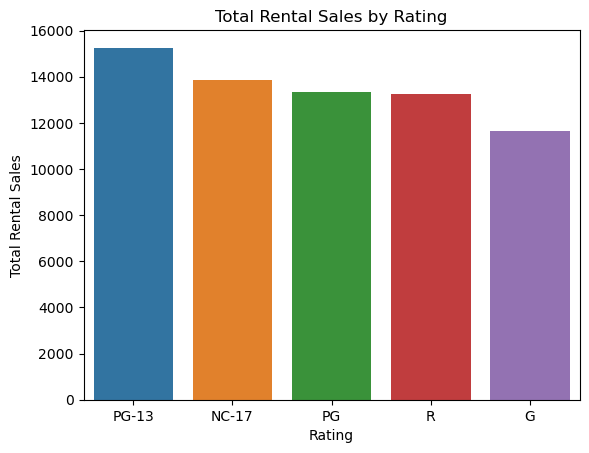

In [28]:
#Setting total rentals sales by rating in a bar chart
ax = sns.barplot(data=ratings_groupby_2, x='rating', y='total_rental_sales')
#setting x,y, and title name
ax.set_ylabel('Total Rental Sales')
ax.set_xlabel('Rating')
ax.set_title('Total Rental Sales by Rating')
#showing plot
plt.show()

In [29]:
#grouping rating by the sum of the rental amount
staff_groupby = movie_rentals_2.groupby(["staff_name"], as_index=False).agg(total_rental_sales=('rental_amount', 'sum'))
#sorting by total_rental_sales
staff_groupby_2 = staff_groupby.sort_values(by=['total_rental_sales'], ascending=False).reset_index()  
#printing chart
staff_groupby_2

,index,staff_name,total_rental_sales
0,0,Jon Stephens,33924.06
1,1,Mike Hillyer,33482.50


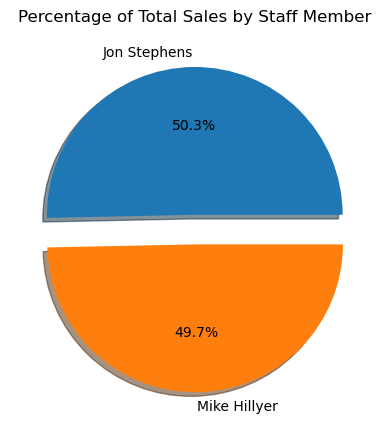

In [31]:
#Piechart of total rental sales by staff member
explode = (0,0.2)
plt.pie(staff_groupby_2.total_rental_sales, labels = staff_groupby_2.staff_name, shadow = True, explode = explode, autopct='%1.1f%%')
plt.title('Percentage of Total Sales by Staff Member')
plt.show()

In [23]:
#sending movie_rentals_2 df to csv --> Tableau
movie_rentals_2.to_csv('movie_rentals.csv')
#sending film_actors df to csv --> Tableau
film_actors.to_csv('film_actors.csv')